In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
import statistics

In [2]:
numerical = pd.read_csv("../numerical.csv")

Check for null values in the numerical columns.


In [3]:
na_numerical = list(i for i in numerical.columns if numerical[i].isna().sum() > 0)

In [4]:
na_numerical

['AGE',
 'NUMCHLD',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'MSA',
 'ADI',
 'DMA',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24',
 'NEXTDATE',
 'TIMELAG']

Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

In [5]:
# I don't have GEOCODE2 in this dataset, I dropped it during class

In [6]:
# Checking for WEALTH1

In [7]:
numerical["WEALTH1"].value_counts(dropna = False)

NaN    41775
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

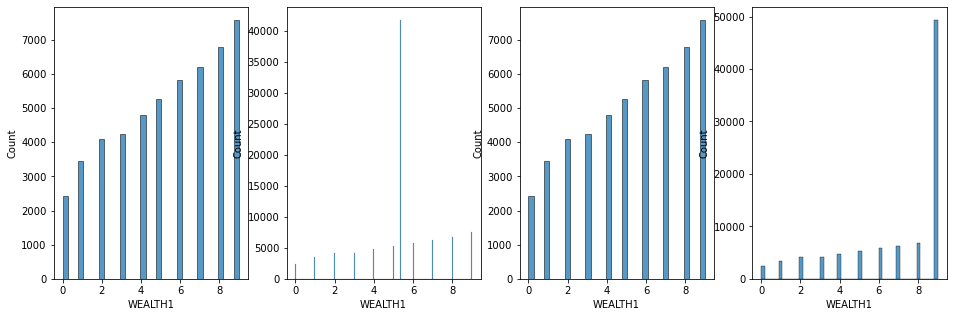

In [8]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
sns.histplot(numerical['WEALTH1'], ax = ax[0])
sns.histplot(numerical["WEALTH1"].fillna(np.mean(numerical['WEALTH1'])), ax = ax[1])
sns.histplot(numerical['WEALTH1'].fillna(statistics.median(numerical['WEALTH1'])),ax = ax[2])
sns.histplot(numerical['WEALTH1'].fillna(numerical['WEALTH1'].mode()[0]),ax = ax[3])
plt.show()

In [9]:
numerical["WEALTH1"] = numerical["WEALTH1"].fillna(numerical['WEALTH1'].mode()[0])

In [10]:
numerical["WEALTH1"].value_counts(dropna = False)

9.0    49360
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

WEALTH1 is a categorical column, so we fill na with the mode. 

In [11]:
#checking for ADI

In [12]:
numerical["ADI"].value_counts(dropna = False)

13.0     6994
51.0     4485
65.0     3611
57.0     2764
105.0    2511
         ... 
651.0       1
601.0       1
145.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [13]:
numerical["ADI"].isna().sum()

123

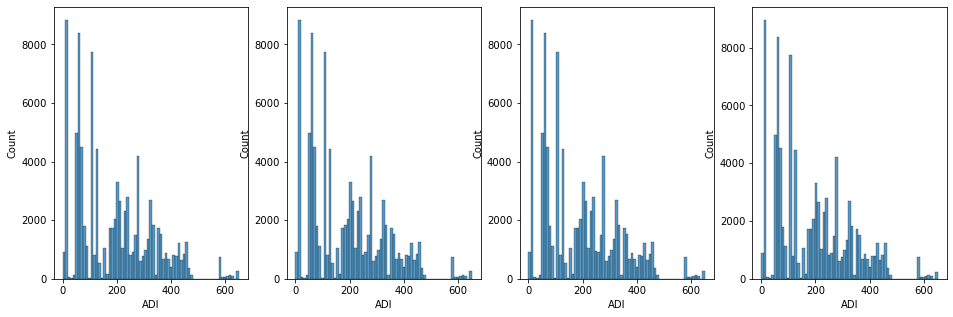

In [14]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
sns.histplot(numerical['ADI'], ax = ax[0])
sns.histplot(numerical['ADI'].fillna(np.mean(numerical['ADI'])), ax = ax[1])
sns.histplot(numerical['ADI'].fillna(statistics.median(numerical['ADI'])),ax = ax[2])
sns.histplot(numerical['ADI'].fillna(numerical['ADI'].mode()[0]),ax = ax[3])
plt.show()

In [15]:
numerical["ADI"] = numerical["ADI"].fillna(numerical['ADI'].mode()[0])

In [16]:
numerical["ADI"].isna().sum()

0

In this we get just a few nan values so there is not much change in the plots filling those nan values with one statisitic or the other, but in this case, since the values are codes, the mode would be the best to use

In [17]:
# Checking for DMA

In [18]:
numerical["DMA"].value_counts()

803.0    6994
602.0    4495
807.0    3611
505.0    2767
819.0    2482
         ... 
502.0       1
554.0       1
584.0       1
569.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

In [19]:
numerical["DMA"].isna().sum()

123

In [20]:
numerical["DMA"] = numerical["DMA"].fillna(numerical['DMA'].mode()[0])

In [21]:
numerical["DMA"].isna().sum()

0

In [22]:
# Checking for MSA

In [23]:
numerical["MSA"].value_counts()

0.0       20661
4480.0     4430
1600.0     3937
2160.0     2517
520.0      1632
          ...  
9140.0        1
3200.0        1
9280.0        1
1320.0        1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [24]:
numerical["MSA"].isna().sum()

123

In [25]:
numerical["MSA"] = numerical["MSA"].fillna(numerical['ADI'].mode()[0])

In [26]:
numerical["MSA"].isna().sum()

0


For DMA, MSA is the same because they showed 123 nan values as ADI. Those values correspond to codes, so it would be no use on calculating the mean. 


Use appropriate EDA technique where ever necessary.

In [27]:
no_wanted = ("WEALTH1", "ADI", "DMA", "MSA")
na_numerical = [i for i in na_numerical if i not in no_wanted]

In [28]:
len(na_numerical)

63

In [29]:
drop_columns = []
def na_to_remove(df, threshold):    
    
    df_2 = df.copy()
    cols = df_2.columns
    rows = df_2.shape[0]
    
    for col in cols:
        na = df_2[col].isna().sum()
        if na > (rows * threshold/100):
            drop_columns.append(col)
        else: 
            pass
    
    return drop_columns

In [30]:
num_na_75 = na_to_remove(numerical, 75)

In [31]:
numerical = numerical.drop([i for i in num_na_75], axis = 1)

In [32]:
no_wanted = num_na_75
na_numerical = [i for i in na_numerical if i not in no_wanted] 

In [33]:
len(na_numerical)

22

In [34]:
na_numerical

['AGE',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'RDATE_12',
 'RDATE_16',
 'RAMNT_12',
 'RAMNT_16',
 'NEXTDATE',
 'TIMELAG']

In [35]:
not_wanted = ["RDATE_12", "RDATE_16",'RAMNT_12','RAMNT_16','NEXTDATE','TIMELAG']
na_numerical = [i for i in na_numerical if i not in not_wanted] 

In [36]:
na_numerical

['AGE',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2']

In [37]:
numerical["WEALTH2"].value_counts(dropna = False)

NaN    42478
9.0     6300
8.0     5799
7.0     5505
6.0     5345
5.0     5178
4.0     4919
3.0     4884
2.0     4826
1.0     4050
0.0     3171
Name: WEALTH2, dtype: int64

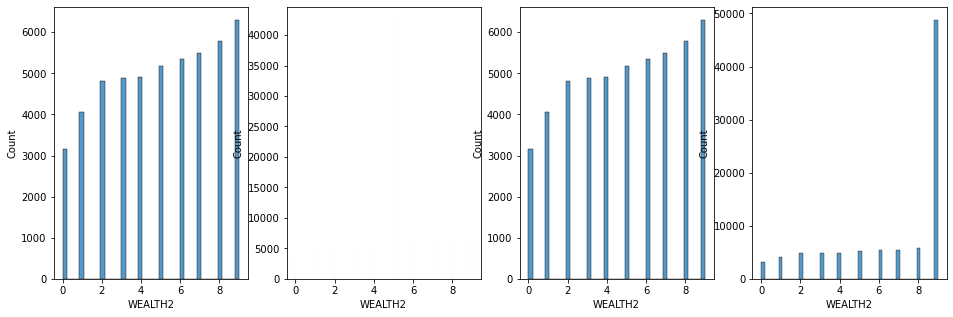

In [38]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
sns.histplot(numerical["WEALTH2"], ax = ax[0])
sns.histplot(numerical["WEALTH2"].fillna(np.mean(numerical["WEALTH2"])), ax = ax[1])
sns.histplot(numerical["WEALTH2"].fillna(statistics.median(numerical["WEALTH2"])),ax = ax[2])
sns.histplot(numerical["WEALTH2"].fillna(numerical["WEALTH2"].mode()[0]),ax = ax[3])
plt.show()

In [39]:
numerical["WEALTH2"] = numerical["WEALTH2"].fillna(numerical["WEALTH2"].mode()[0])

In [40]:
numerical["WEALTH2"].value_counts(dropna = False)

9.0    48778
8.0     5799
7.0     5505
6.0     5345
5.0     5178
4.0     4919
3.0     4884
2.0     4826
1.0     4050
0.0     3171
Name: WEALTH2, dtype: int64

In this case, we have a categorical column, applying the mode looks like the best option

In [41]:
not_wanted = ["WEALTH2"]
na_numerical = [i for i in na_numerical if i not in not_wanted]

In [42]:
na_numerical

['AGE',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP']

In [43]:
numerical["AGE"].value_counts(dropna = False)

NaN     21907
50.0     1904
76.0     1847
72.0     1788
68.0     1784
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: AGE, Length: 97, dtype: int64

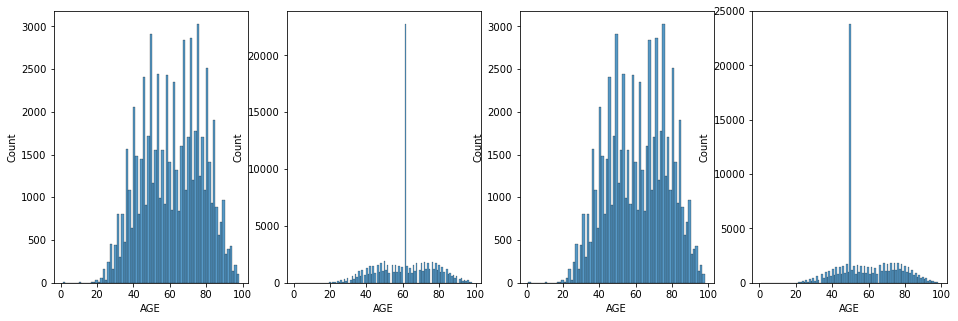

In [44]:
fig, ax = plt.subplots(1,4,figsize=(16,5))
sns.histplot(numerical["AGE"], ax = ax[0])
sns.histplot(numerical["AGE"].fillna(np.mean(numerical["AGE"])), ax = ax[1])
sns.histplot(numerical["AGE"].fillna(np.median(numerical["AGE"])),ax = ax[2])
sns.histplot(numerical["AGE"].fillna(numerical["AGE"].mode()[0]),ax = ax[3])
plt.show()

In [45]:
numerical["AGE"] = numerical["AGE"].fillna(np.median(numerical["AGE"]))

In [46]:
for i in na_numerical:
    print(i,"value counts:\n",numerical[i].value_counts(dropna = False))
    print("\n")

AGE value counts:
 NaN     21907
50.0     1904
76.0     1847
72.0     1788
68.0     1784
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: AGE, Length: 97, dtype: int64


MBCRAFT value counts:
 NaN    49897
0.0    37707
1.0     3521
2.0     1079
3.0      215
4.0       33
5.0        2
6.0        1
Name: MBCRAFT, dtype: int64


MBGARDEN value counts:
 NaN    49897
0.0    40286
1.0     2054
2.0      193
3.0       22
4.0        3
Name: MBGARDEN, dtype: int64


MBBOOKS value counts:
 NaN    49897
0.0    21299
1.0    10371
2.0     4664
3.0     2465
4.0     1469
5.0      901
6.0      538
9.0      325
7.0      325
8.0      201
Name: MBBOOKS, dtype: int64


MBCOLECT value counts:
 NaN    49957
0.0    40267
1.0     1837
2.0      324
3.0       54
4.0       11
5.0        4
6.0        1
Name: MBCOLECT, dtype: int64


MAGFAML value counts:
 NaN    49897
0.0    29790
1.0     8468
2.0     2859
3.0     1007
4.0      332
5.0       77
6.0       17
7.0        7
9.0 

Here we can see that the rest of columns, except for AGE, are categorical, so the way to fill na values is using mode

In [47]:
for i in na_numerical:
    numerical[i] = numerical[i].fillna(numerical[i].mode()[0])